# Synth2D

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

from parse import parse
from kolmopy.datasets.synth2D import Synth2D
from kolmopy.convention import _check_ij_indexing

In [3]:
data_path = Path('..','.cached','Synth2D_0053.hdf5')
data_path.exists()

# initialize the dataset (this does not load the data)
synth2D = Synth2D(data_path)
print(synth2D)

print(synth2D.dset.keys())

Synth2D stored in ../.cached/Synth2D_0053.hdf5.
- variables dict_keys(['txy'])
- fields: dict_keys(['uvw']) 
<KeysViewHDF5 ['txy_vars']>


In [4]:
synth2D.cite()

========== BibTeX ==========

@misc{}



In [5]:
synth2D.validate()

Check data dimensions... (512, 512, 2)
done!


## Single Image Processing

In [6]:
time_idx = np.array([1])
time_idx = 0
synth2D.load_data(time_idx, only_vel_field=False)

# t = synth2D.t
# xy = synth2D.xy
# uv = synth2D.uv
# xy = synth2D.xy
xy = synth2D.xy
uv = synth2D.uv
W = synth2D.w

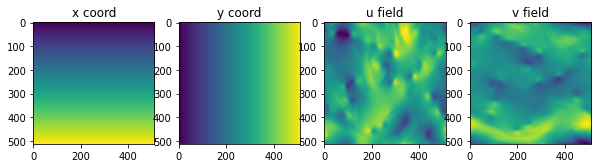

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(141)
plt.title('x coord')
plt.imshow(xy[:,:,0])
plt.subplot(142)
plt.title('y coord')
plt.imshow(xy[:,:,1])
plt.subplot(143)
plt.title('u field')
plt.imshow(uv[:,:,0])
plt.subplot(144)
plt.title('v field')
plt.imshow(uv[:,:,1])
plt.show()

In [8]:
import kolmopy.utils.viz_utils as viz
import kolmopy.utils.phy_utils as phy

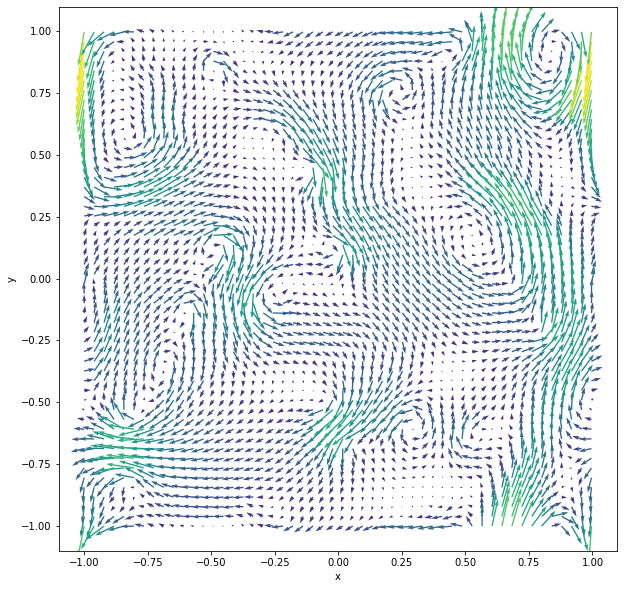

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
viz.plot_2D_velocity_field(xy, uv, step=10, scale=100, ax=ax)
plt.show()

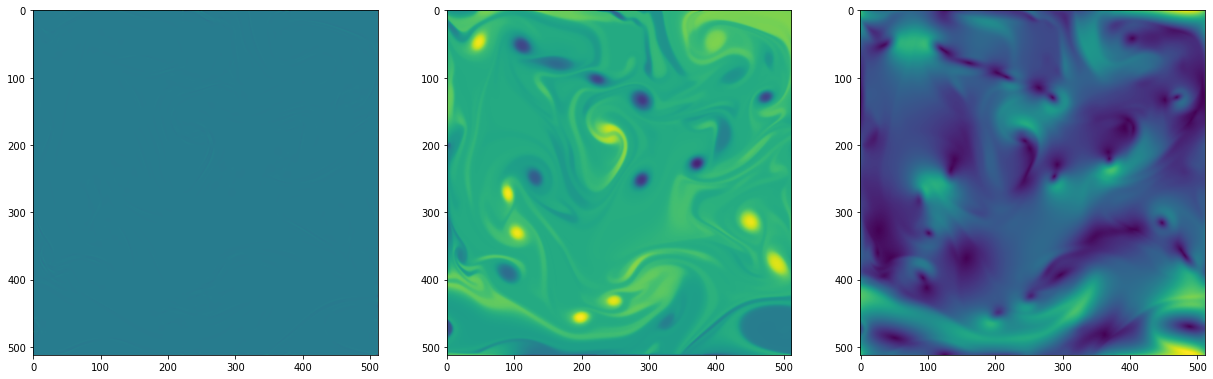

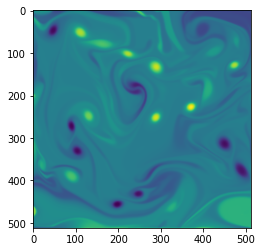

In [18]:
fig, ax = plt.subplots(figsize=(21,7))

d = phy.compute_divergence(xy, uv, order=2)
w = phy.compute_vorticity(xy, uv, order=2)
m = phy.compute_magnitude(uv)

plt.subplot(131)
plt.imshow(d)
plt.subplot(132)
plt.imshow(w)
plt.subplot(133)
plt.imshow(m)
plt.show()

plt.imshow(W)
plt.show()

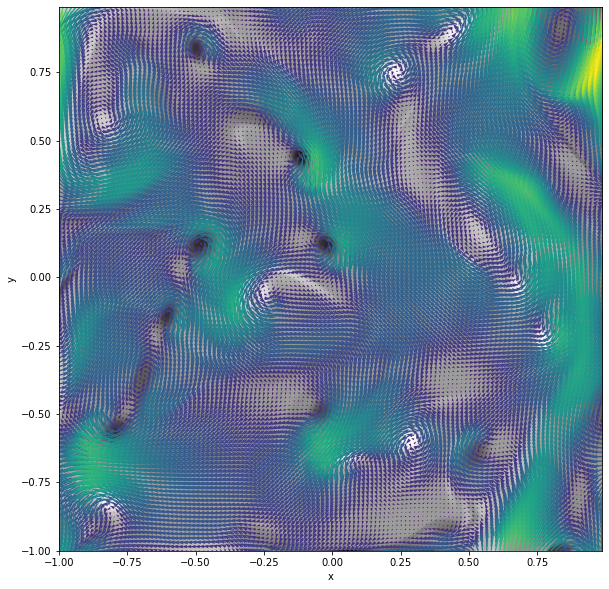

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
viz.plot_2D_velocity_field(xy, uv, step=4, scale=100, ax=ax,
        bg_img=w, bg_img_indexing='ij')
plt.show()